In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def show_image(image):
    plt.imshow(image)
    plt.show()

In [2]:
image_name = os.path.join(
    os.getcwd(), 'test/nf_mc_friend_avatars/frame_158.jpg'
)
image = cv2.imread(image_name, 0)

# <img src="test/nf_mc_friend_avatars/frame_158.jpg" />

In [6]:
image.shape

(590, 1280)

In [ ]:
# make it defaults

In [7]:
default_image_shape = (590, 1280)

In [9]:
tmp = image.copy()

In [11]:
# tmp.reshape(default_image_shape)

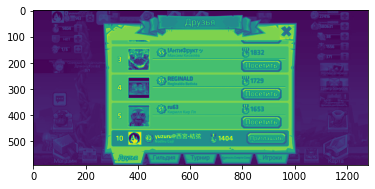

In [12]:
show_image(tmp.reshape(default_image_shape))

In [13]:
#       (FRAME)             (R)       (L)         (R)
# +----------------+    +--------+-------+
# |                |    |--------|       |    +--------+
# |                | -> |        |       | -> |        |
# |                |    |--------|       |    +--------+
# +----------------+    +--------+-------+
#

In [14]:
x, y = default_image_shape

In [15]:
x

590

In [16]:
x / 2

295.0

In [36]:
#tmp[:x]

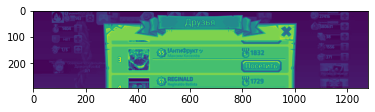

In [19]:
show_image(tmp[:int(x/2)])

In [20]:
y

1280

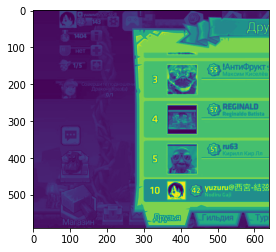

In [23]:
show_image(tmp[:,:int(y/2)])

In [30]:
def get_right(image, y_shape):
    return image[:,:int(y_shape/2)]

In [31]:
image_right_side = get_right(tmp, y)

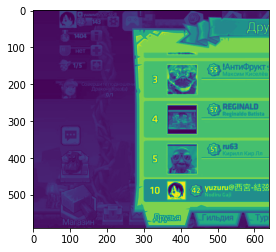

In [32]:
show_image(image_right_side)

In [33]:
def get_left_side(image, y_shape):
    return image[:,int(y_shape/2):]

In [34]:
image_left_side = get_left_side(image_right_side, int(y/2))

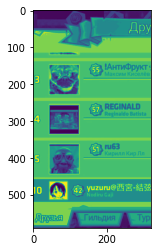

In [35]:
show_image(image_left_side)

In [45]:
top_side = image_left_side[int(x/5):]

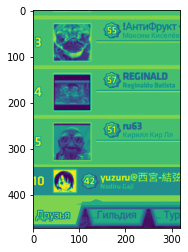

In [46]:
show_image(top_side)

In [43]:
x_delimiter = int(x/5)

In [41]:
y_delimiter = int(y/2)

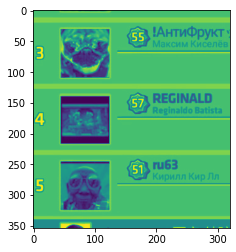

In [47]:
show_image(top_side[:-x_delimiter])

In [48]:
p_f = top_side[:-x_delimiter]

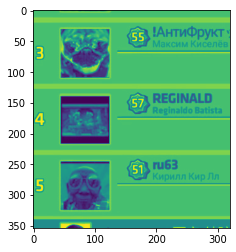

In [49]:
show_image(p_f)

In [50]:
p_f.shape

(354, 320)

In [52]:
n_rs = get_right(p_f, p_f.shape[1])

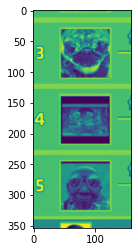

In [53]:
show_image(n_rs)

In [74]:
def get_mc_friend_avatar_column(image):
    'right,left,top,bottom,right'
    # order -> top,bottom
    setb = image[x_delimiter:-x_delimiter]
    setb = setb[:, :y_delimiter]
    setb = setb[:, int(y_delimiter/2):]
    setb = setb[:, :-int(setb.shape[1]/2)]
    show_image(setb)
    return setb

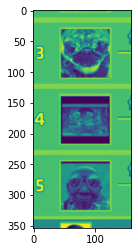

In [75]:
setb = get_mc_friend_avatar_column(tmp)

In [134]:
new_image = cv2.imread('test/nf_mc_friend_avatars/frame_158.jpg')
g_new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

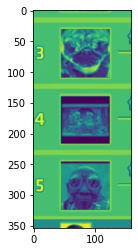

In [135]:
setv = get_mc_friend_avatar_column(g_new_image)

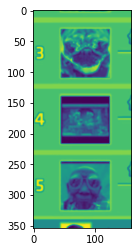

In [136]:
blurred = cv2.GaussianBlur(setv, (3, 3), 0)
show_image(blurred)

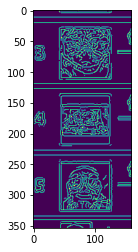

In [137]:
canny = cv2.Canny(blurred, 20, 40)
show_image(canny)

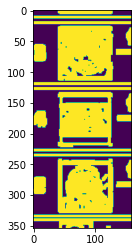

In [138]:
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(canny, kernel, iterations=2)
show_image(dilated)